# Keras Classification
Data: Breast Cancer Wisconsin (Diagnostic) Dataset

Source: Kaggle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('cancer_classification.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

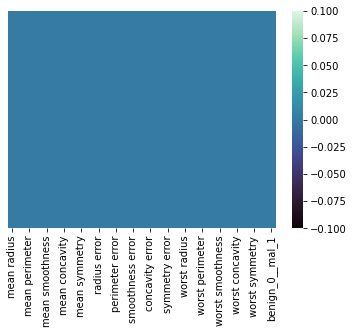

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='mako')

# EDA

In [19]:
# Seeing if the target is well balanced.
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

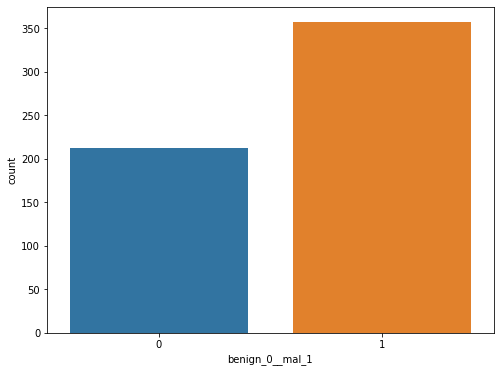

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x='benign_0__mal_1', data=df)

<Figure size 864x720 with 0 Axes>

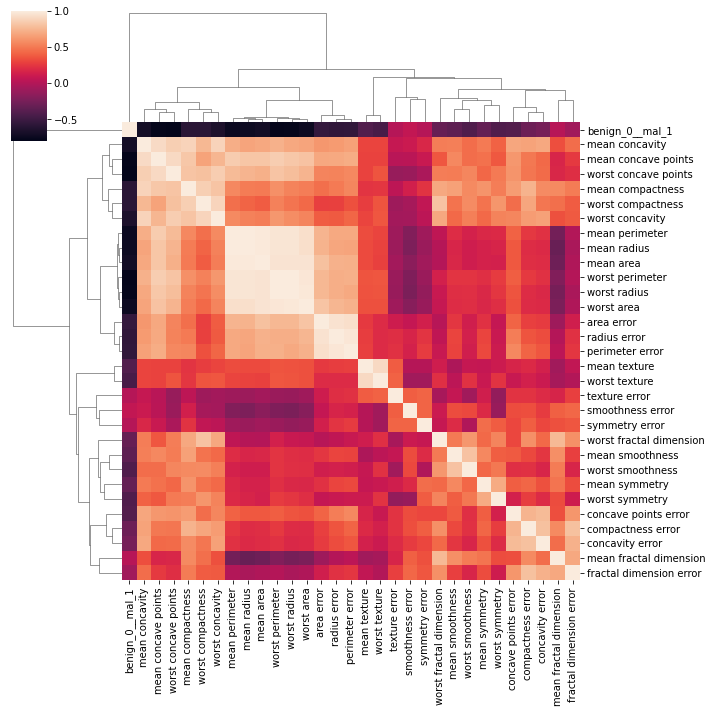

In [62]:
plt.figure(figsize=(12,10))
sns.clustermap(df.corr())

<AxesSubplot:>

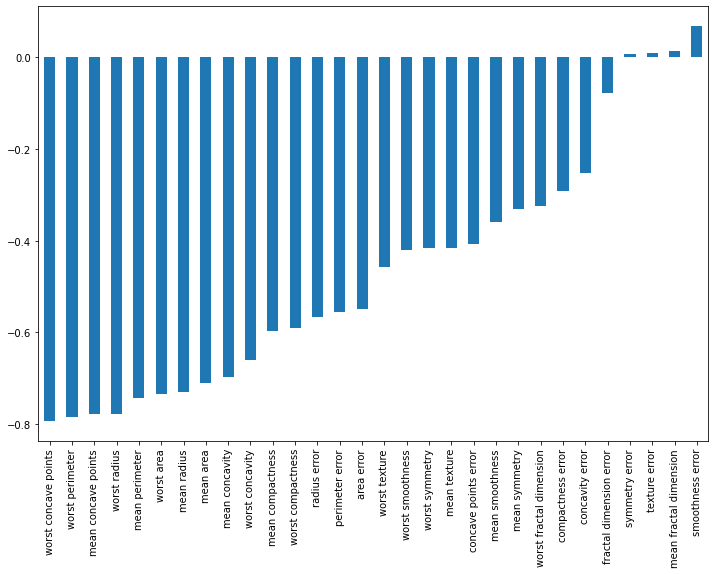

In [82]:
plt.figure(figsize=(12,8))
df.corr()['benign_0__mal_1'].sort_values().drop('benign_0__mal_1').plot(kind='bar')

# Training

In [87]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=13)

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()

In [92]:
X_train = scaler.fit_transform(X_train)

In [93]:
X_test = scaler.transform(X_test)

In [94]:
from tensorflow.keras.models import Sequential

In [95]:
from tensorflow.keras.layers import Dense, Dropout

In [97]:
# There are 30 features
X_train.shape

(426, 30)

In [106]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classfication 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [100]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6783 - val_loss: 0.6639
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6391 - val_loss: 0.6297
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6072 - val_loss: 0.5952
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5723 - val_loss: 0.5556
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5299 - val_loss: 0.5148
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4844 - val_loss: 0.4660
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4344 - val_loss: 0.4181
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3877 - val_loss: 0.3739
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3470 - val_loss: 0.3371
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3124 - val_loss: 0.3085
Epoch 11/

In [102]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

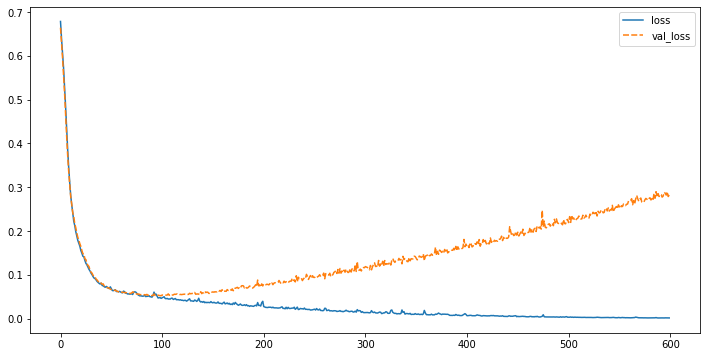

In [105]:
plt.figure(figsize=(12,6))
sns.lineplot(data=losses)

### This is an good example of overfitting because our validation loss is increasing while loss is decreasing.

In [120]:
from tensorflow.keras.callbacks import EarlyStopping

In [129]:
# Add fuction to stop at a certain point for minimum validation loss
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [122]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classfication 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [123]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6804 - val_loss: 0.6611
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6466 - val_loss: 0.6340
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6165 - val_loss: 0.6002
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5782 - val_loss: 0.5574
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5317 - val_loss: 0.5106
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4817 - val_loss: 0.4603
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4324 - val_loss: 0.4151
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3904 - val_loss: 0.3680
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3457 - val_loss: 0.3363
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3044 - val_loss: 0.2983
Epoch 11/

In [124]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

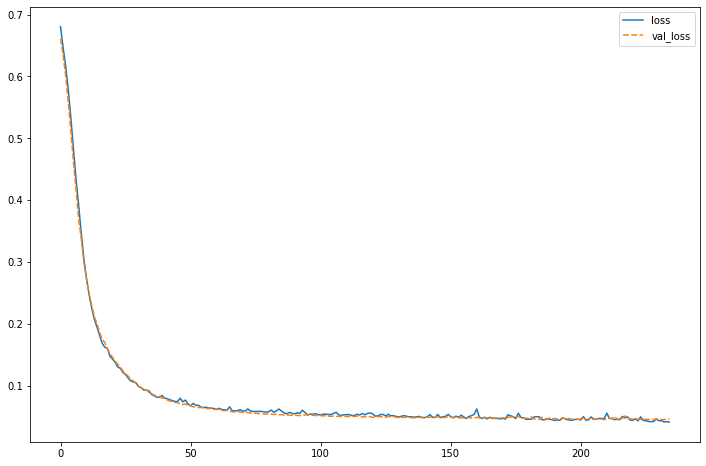

In [128]:
plt.figure(figsize=(12,8))
sns.lineplot(data=model_loss)

In [130]:
from tensorflow.keras.layers import Dropout

In [131]:
# Adding dropout function to turn of nuerals for each batch
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# Binary classfication 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [132]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7054 - val_loss: 0.6644
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6769 - val_loss: 0.6511
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6484 - val_loss: 0.6337
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6414 - val_loss: 0.6112
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6217 - val_loss: 0.5839
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5996 - val_loss: 0.5597
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5751 - val_loss: 0.5341
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5553 - val_loss: 0.5081
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5509 - val_loss: 0.4870
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5305 - val_loss: 0.4619
Epoch 11/

In [133]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

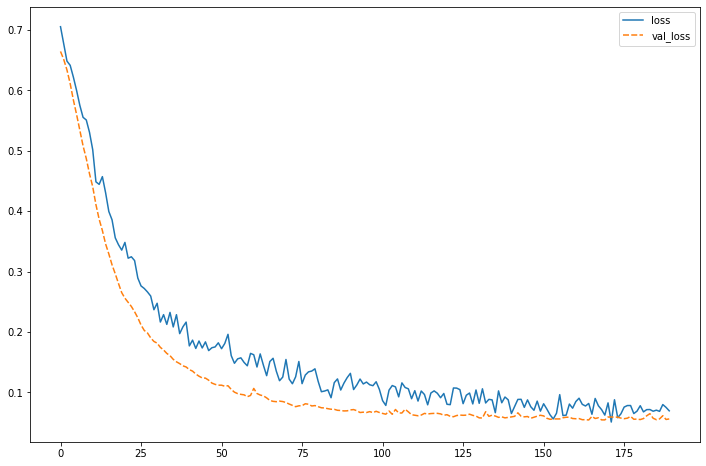

In [136]:
plt.figure(figsize=(12,8))
sns.lineplot(data=model_loss)

In [140]:
model.predict(X_test)

5/5 [==============================] - 0s 750us/step


array([[7.54883230e-01],
       [9.98103499e-01],
       [9.99572098e-01],
       [4.33902908e-03],
       [9.99667108e-01],
       [2.68597691e-03],
       [9.94590402e-01],
       [9.99047816e-01],
       [9.96224463e-01],
       [9.62081254e-01],
       [9.99904633e-01],
       [9.85832036e-01],
       [9.99887347e-01],
       [2.13155573e-07],
       [4.13553510e-03],
       [9.99839664e-01],
       [9.95896041e-01],
       [9.98292565e-01],
       [9.99696195e-01],
       [1.88944402e-10],
       [9.98232424e-01],
       [9.52900887e-01],
       [1.32627813e-02],
       [9.99657094e-01],
       [9.99101996e-01],
       [1.42918462e-02],
       [9.78398144e-01],
       [3.13179946e-04],
       [9.98094261e-01],
       [1.15149833e-05],
       [9.78007317e-01],
       [1.93321671e-06],
       [9.99582648e-01],
       [9.98569071e-01],
       [8.32937452e-09],
       [9.56413746e-01],
       [9.96429682e-01],
       [9.99917448e-01],
       [9.50457633e-01],
       [7.10567236e-01],


In [143]:
predictions = (model.predict(X_test) > .5)*1

5/5 [==============================] - 0s 750us/step


In [144]:
from sklearn.metrics import classification_report, confusion_matrix

In [145]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        49
           1       0.98      1.00      0.99        94

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [150]:
cm = confusion_matrix(y_test, predictions)

Text(69.0, 0.5, 'Actual')

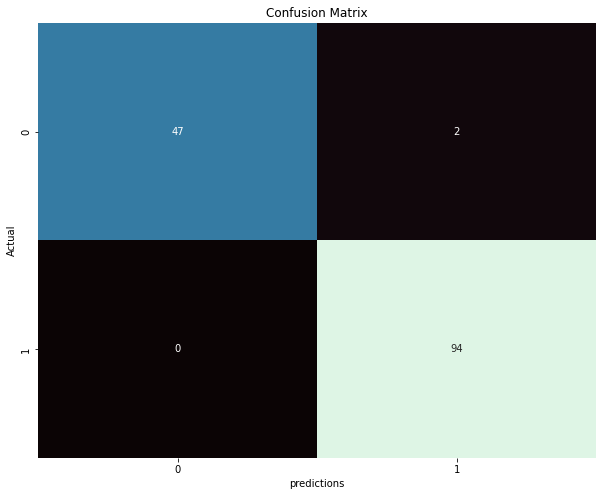

In [165]:
plt.figure(figsize=(10,8))
fig = sns.heatmap(cm, annot=True, cbar=False, cmap='mako')
fig.set_title('Confusion Matrix')
fig.set_xlabel('predictions')
fig.set_ylabel('Actual')